In [43]:
import tensorflow as tf
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
from tensorflow.keras import datasets, layers, models
%matplotlib inline
#tf.reset_default_graph()
#sess = tf.InteractiveSession()

In [44]:
mnist = tf.keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [45]:
batch_size = 100
image_width = image_height = 28
num_class = 10

X_train = X_train[:,:,:,np.newaxis]
X_test = X_test[:,:,:,np.newaxis]

In [46]:
Y_test.shape

(10000,)

5


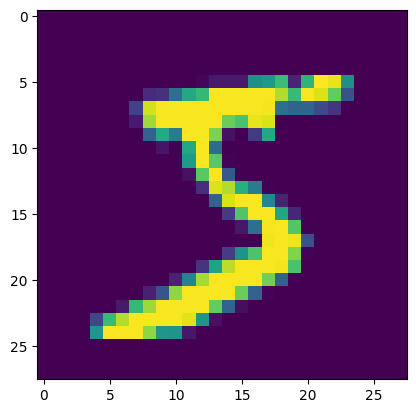

In [47]:
plt.imshow(X_train[0][:,:])
print(Y_train[0])

# Bài tập 2

## Các tầng và tác dụng của từng tầng

In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

1. **Tầng Convolution 2D đầu tiên:**
   - **`Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))`**: Đây là lớp tích chập (Convolutional Layer).
     - **Tác dụng**: Tầng này sử dụng 32 bộ lọc kích thước 3x3 để trích xuất các đặc trưng từ ảnh đầu vào 28x28 (ảnh xám với 1 kênh màu). Kích hoạt ReLU được sử dụng để giữ lại các đặc trưng có giá trị dương, loại bỏ giá trị âm, giúp học các đặc trưng phi tuyến.
     - **Mục đích**: Học các đặc trưng cơ bản như cạnh và góc từ ảnh đầu vào.

2. **Tầng Max Pooling 2D đầu tiên:**
   - **`MaxPooling2D((2, 2))`**: Lớp lấy mẫu cực đại (Max Pooling Layer).
     - **Tác dụng**: Giảm kích thước không gian của đầu vào (từ lớp trước) bằng cách lấy giá trị lớn nhất trong mỗi vùng 2x2. Điều này giúp giảm số lượng tham số và ngăn chặn overfitting.
     - **Mục đích**: Giảm độ phức tạp của mô hình và duy trì các đặc trưng quan trọng.

3. **Tầng Convolution 2D thứ hai:**
   - **`Conv2D(64, (3, 3), activation='relu')`**: Thêm một lớp tích chập 2D khác.
     - **Tác dụng**: Sử dụng 64 bộ lọc 3x3 để học các đặc trưng phức tạp hơn từ đầu vào sau khi đã qua pooling. Lúc này, mạng bắt đầu học các đặc trưng trừu tượng hơn, không chỉ dừng lại ở các cạnh và góc.
     - **Mục đích**: Học thêm các đặc trưng phức tạp hơn từ đầu vào đã giảm kích thước.

4. **Tầng Max Pooling 2D thứ hai:**
   - **`MaxPooling2D((2, 2))`**: Lớp pooling lần thứ hai.
     - **Tác dụng**: Giảm kích thước không gian một lần nữa, tương tự như tầng pooling trước đó. Điều này giúp mô hình tổng quát hóa tốt hơn và giảm thêm số lượng tham số.
     - **Mục đích**: Tiếp tục giảm độ phức tạp, trích xuất các đặc trưng quan trọng.

5. **Tầng Convolution 2D thứ ba:**
   - **`Conv2D(64, (3, 3), activation='relu')`**: Thêm một lớp tích chập nữa với 64 bộ lọc 3x3.
     - **Tác dụng**: Lớp này giúp mạng học các đặc trưng sâu hơn và trừu tượng hơn từ dữ liệu đầu vào đã được xử lý qua các lớp trước đó. Tại đây, mạng sẽ có khả năng học những đặc trưng chi tiết và quan trọng cho việc phân loại hoặc dự đoán.
     - **Mục đích**: Học các đặc trưng sâu hơn và trừu tượng từ các tầng trước.



In [49]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Các lớp `Flatten`, `Dense` đã được thêm vào để xây dựng phần đầu ra của mạng:

6. **Tầng Flatten:**
   - **`Flatten()`**: Đây là tầng chuyển đổi (Flatten Layer).
     - **Tác dụng**: Lớp `Flatten` sẽ chuyển đổi dữ liệu từ dạng nhiều chiều thành một vector một chiều. Ví dụ, nếu đầu vào của tầng này có kích thước (batch_size, 3, 3, 64) (có nghĩa là dữ liệu từ các lớp tích chập trước có 3x3x64 đặc trưng), thì lớp `Flatten` sẽ chuyển thành (batch_size, 576) - nghĩa là mỗi ảnh giờ trở thành một vector với 576 giá trị.
     - **Mục đích**: Chuyển đổi dữ liệu từ dạng ma trận 2D hoặc 3D thành một vector để kết nối với các tầng Dense phía sau. Điều này cần thiết để chuyển từ phần trích xuất đặc trưng (Convolutional) sang phần phân loại (Dense).

7. **Tầng Dense đầu tiên:**
   - **`Dense(64, activation='relu')`**: Đây là tầng kết nối đầy đủ (Fully Connected Layer).
     - **`64`**: Số lượng nơ-ron trong lớp này là 64.
     - **`activation='relu'`**: Sử dụng hàm kích hoạt ReLU, giúp mạng có thể học các đặc trưng phi tuyến tính. ReLU chuyển các giá trị âm thành 0, làm cho việc tính toán trở nên đơn giản hơn.
     - **Tác dụng**: Lớp này sẽ kết nối đầy đủ các đặc trưng đã học từ các lớp trước và sử dụng chúng để trích xuất thêm các đặc trưng ở mức cao hơn, kết hợp tất cả các thông tin từ các tầng tích chập trước.
     - **Mục đích**: Lớp Dense này đóng vai trò tổng hợp và kết hợp các đặc trưng đã học từ các tầng trước, học các mẫu đặc trưng tổng quát và phi tuyến.

8. **Tầng Dense cuối cùng:**
   - **`Dense(10)`**: Lớp kết nối đầy đủ với 10 đầu ra.
     - **`10`**: Số lượng nơ-ron ở tầng này là 10, tương ứng với số lượng lớp cần phân loại. Ví dụ, trong bài toán phân loại ảnh chữ số từ 0 đến 9 (như MNIST), chúng ta có 10 lớp.
     - **Tác dụng**: Đây là tầng đầu ra của mô hình. Nó tạo ra 10 giá trị tương ứng với xác suất cho mỗi lớp (class). Thông thường, tầng này sẽ kết hợp với hàm `softmax` trong quá trình huấn luyện để tính xác suất thuộc về mỗi lớp.
     - **Mục đích**: Cung cấp đầu ra cuối cùng của mô hình, mỗi đầu ra tương ứng với xác suất mà đầu vào thuộc về từng lớp phân loại cụ thể.

## Tổng quan Kiến trúc Mô hình

Mô hình của bạn là một **mạng nơ-ron tích chập (Convolutional Neural Network - CNN)** với các tầng chính như sau:

1. **Tầng Tích Chập và Giảm Kích Thước (Feature Extraction Layers):**
   - **Tầng 1: Convolution 2D (Conv2D)** với 32 bộ lọc, kích thước bộ lọc 3x3, sử dụng hàm kích hoạt ReLU.
     - Học các đặc trưng cơ bản từ ảnh đầu vào, như cạnh, góc.
     - **Đầu vào:** Ảnh kích thước 28x28x1 (ảnh xám với 1 kênh màu).
   - **Tầng 2: MaxPooling 2D** với kích thước 2x2.
     - Giảm kích thước không gian của ảnh xuống còn một nửa (từ 28x28 thành 14x14).
   - **Tầng 3: Convolution 2D (Conv2D)** với 64 bộ lọc, kích thước bộ lọc 3x3, sử dụng hàm kích hoạt ReLU.
     - Học các đặc trưng phức tạp hơn từ ảnh đã qua pooling.
   - **Tầng 4: MaxPooling 2D** với kích thước 2x2.
     - Tiếp tục giảm kích thước không gian của ảnh (từ 14x14 thành 7x7).
   - **Tầng 5: Convolution 2D (Conv2D)** với 64 bộ lọc, kích thước bộ lọc 3x3, sử dụng hàm kích hoạt ReLU.
     - Học các đặc trưng sâu hơn và trừu tượng hơn.

2. **Tầng Chuyển Đổi và Kết Nối Đầy Đủ (Classification Layers):**
   - **Tầng 6: Flatten**
     - Chuyển đổi dữ liệu từ dạng nhiều chiều (7x7x64) thành một vector một chiều (kích thước 3136) để chuẩn bị cho tầng kết nối đầy đủ.
   - **Tầng 7: Dense (Fully Connected)** với 64 nơ-ron và hàm kích hoạt ReLU.
     - Kết nối đầy đủ, học các đặc trưng tổng quát từ dữ liệu đầu vào đã được flatten. Hàm kích hoạt ReLU giúp thêm tính phi tuyến.
   - **Tầng 8: Dense (Fully Connected)** với 10 nơ-ron (đầu ra).
     - Cung cấp đầu ra với 10 giá trị tương ứng với xác suất của mỗi lớp cần phân loại (ví dụ từ 0 đến 9).

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=1,
                    validation_data=(X_test, Y_test))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.8706 - loss: 0.9660 - val_accuracy: 0.9777 - val_loss: 0.0759


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
9


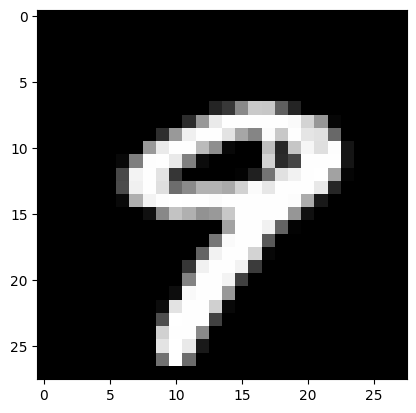

In [52]:
plt.imshow(X_test[9].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[9].reshape(1,28,28,1))
print(np.argmax(y_predict))

# Bài tập 3

In [53]:
from tensorflow.keras.models import Model
sample_image = np.expand_dims(X_train[0], axis=0)

inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10)(x)

model = Model(inputs=inputs, outputs=outputs)

layer_outputs = [layer.output for layer in model.layers]
intermediate_model = Model(inputs=model.input, outputs=layer_outputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Layer input_layer_5
Layer conv2d_15


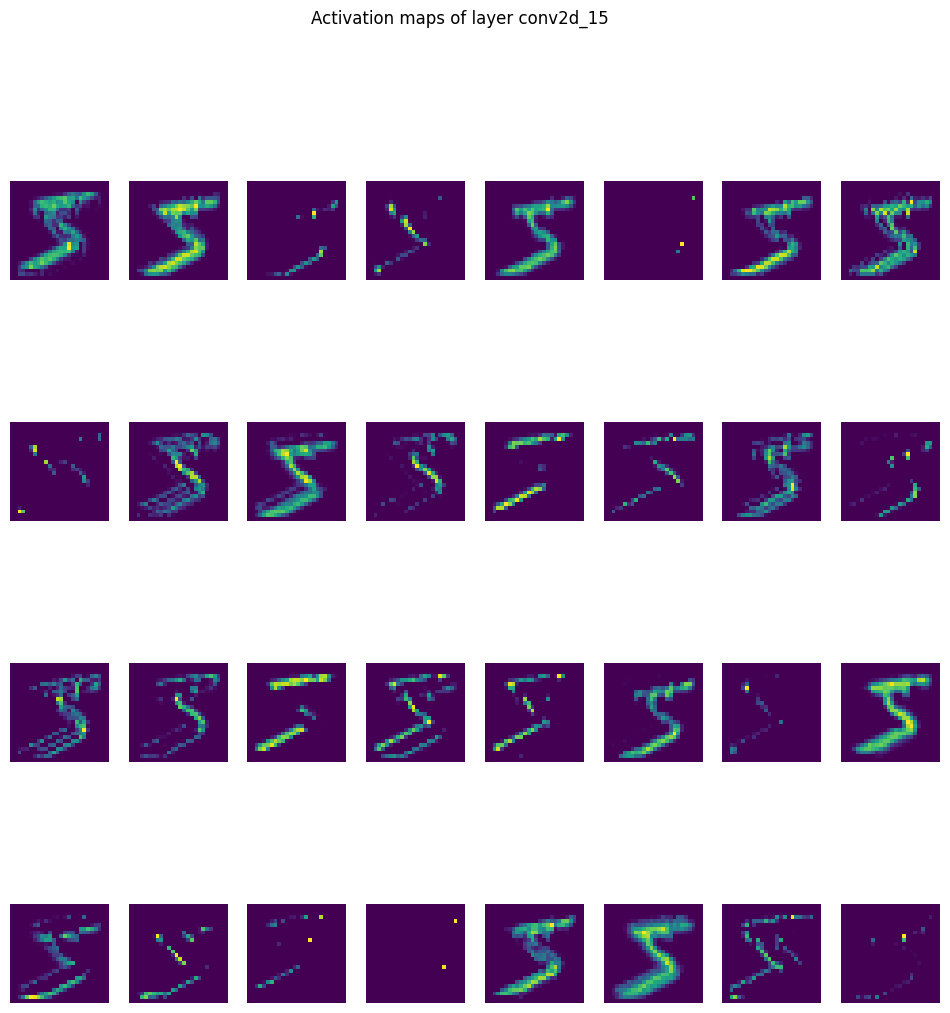

Layer max_pooling2d_10


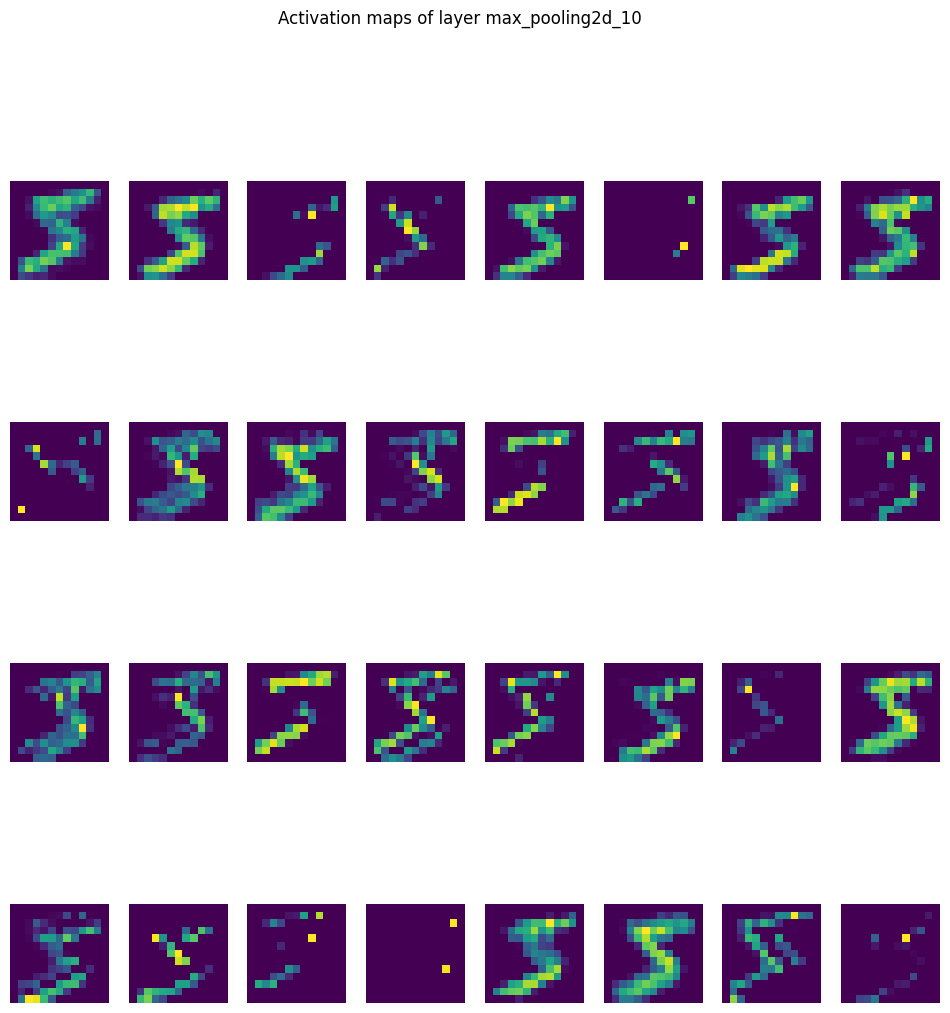

Layer conv2d_16


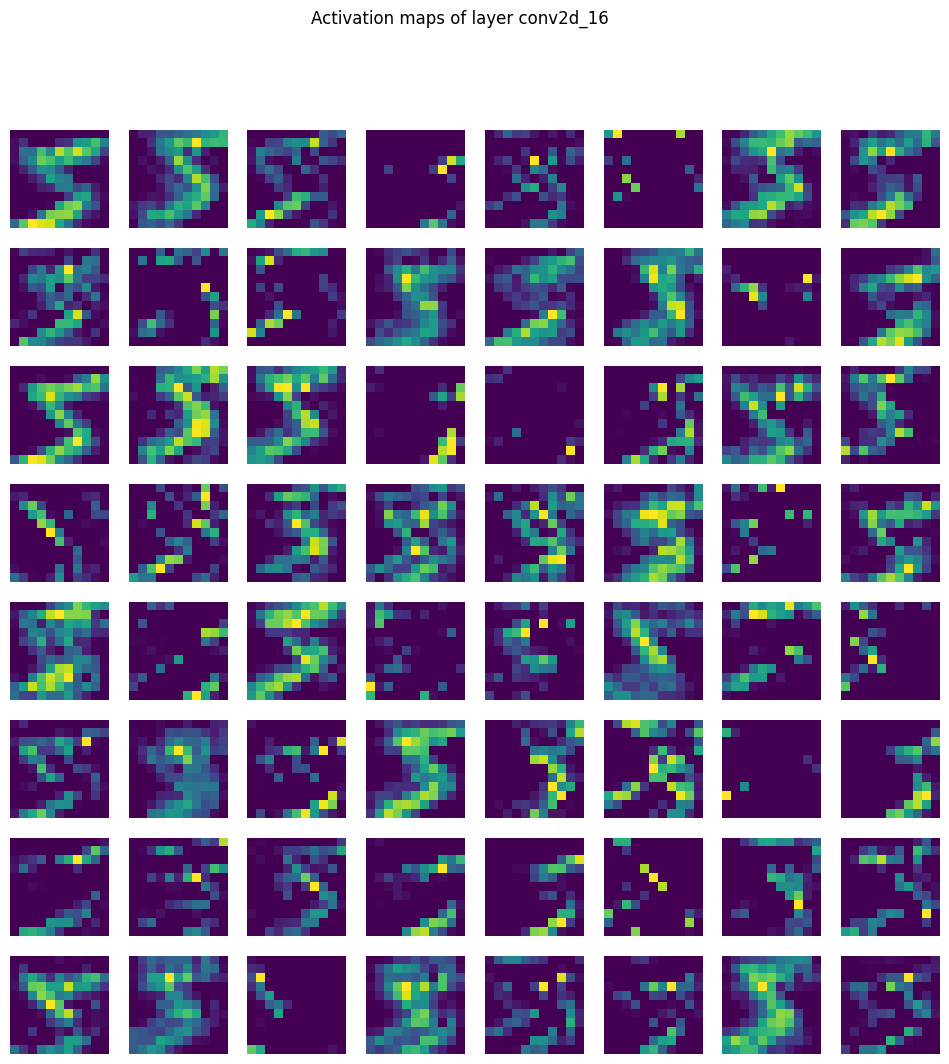

Layer max_pooling2d_11


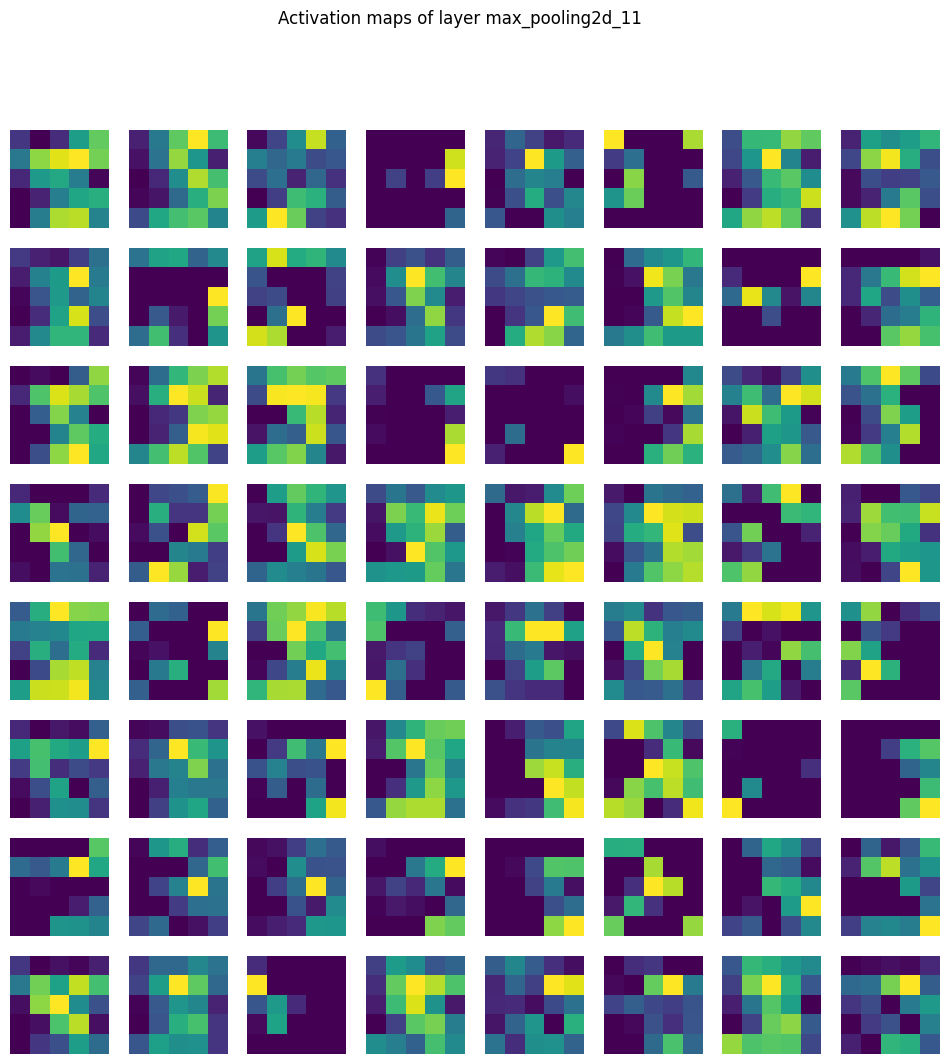

Layer conv2d_17


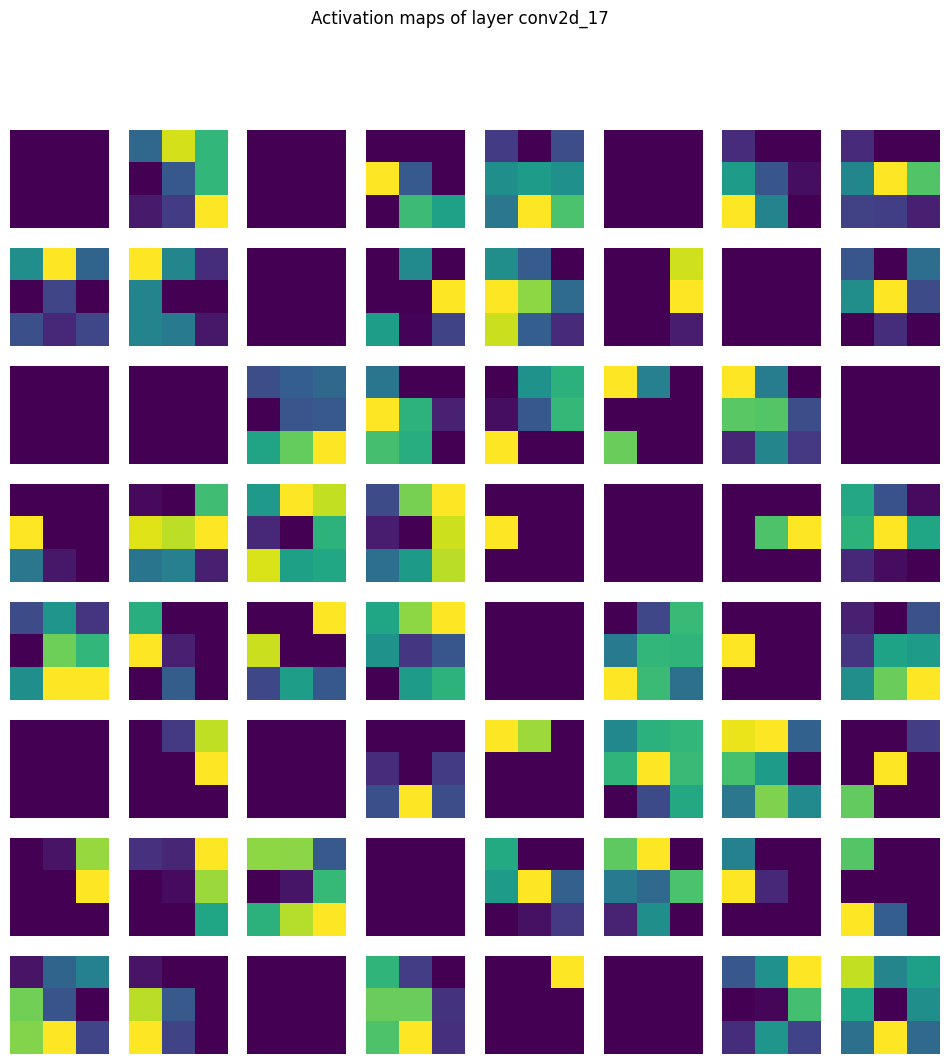

Layer flatten_5


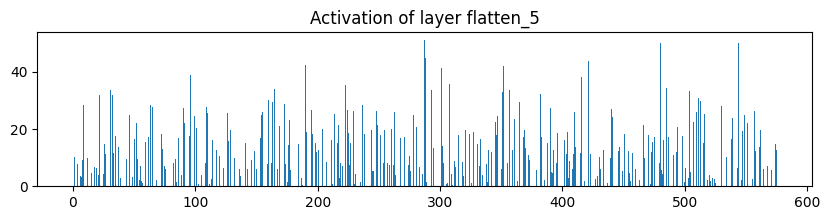

Layer dense_10


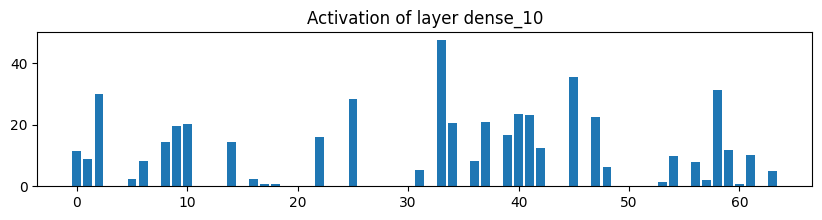

Layer dense_11


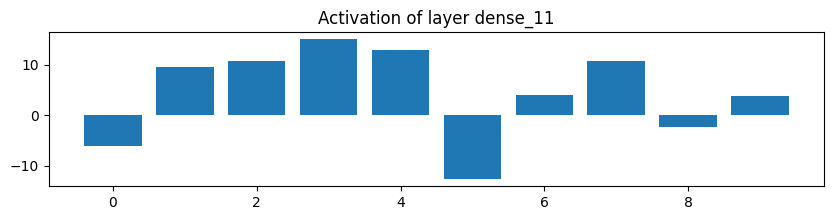

In [54]:
layer_outputs = intermediate_model.predict(sample_image)

for i, output in enumerate(layer_outputs):
    layer = model.layers[i]
    print(f"Layer {layer.name}")

    if 'conv' in layer.name or 'max_pooling' in layer.name:
        num_filters = output.shape[-1]
        size = output.shape[1]

        n_cols = 8
        n_rows = num_filters // n_cols + (num_filters % n_cols > 0)
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
        fig.suptitle(f"Activation maps of layer {layer.name}")

        for j in range(num_filters):
            row = j // n_cols
            col = j % n_cols
            if j < n_rows * n_cols:
                axes[row, col].imshow(output[0, :, :, j], cmap='viridis')
                axes[row, col].axis('off')

        for j in range(num_filters, n_rows * n_cols):
            axes[j // n_cols, j % n_cols].axis('off')

        plt.show()

    elif 'flatten' in layer.name or 'dense' in layer.name:
        plt.figure(figsize=(10, 2))
        plt.title(f"Activation of layer {layer.name}")
        plt.bar(range(output.shape[-1]), output[0])
        plt.show()
